In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
%matplotlib inline
import matplotlib 
import math
import seaborn as sns

In [2]:
connex = sqlite3.connect('database.sqlite')
cur = connex.cursor()

In [3]:
loanbook = pd.read_sql_query('select * from loan;', connex)


In [4]:
list(loanbook)

['index',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',


In [5]:
sublnbk = loanbook[['home_ownership', 'addr_state', 'annual_inc', 'revol_bal', 'dti', 'emp_length', 'delinq_2yrs', 'total_acc']]
print(sublnbk.head(10))

  home_ownership addr_state  annual_inc  revol_bal    dti emp_length  \
0           RENT         AZ     24000.0    13648.0  27.65  10+ years   
1           RENT         GA     30000.0     1687.0   1.00   < 1 year   
2           RENT         IL     12252.0     2956.0   8.72  10+ years   
3           RENT         CA     49200.0     5598.0  20.00  10+ years   
4           RENT         OR     80000.0    27783.0  17.94     1 year   
5           RENT         AZ     36000.0     7963.0  11.20    3 years   
6           RENT         NC     47004.0    17726.0  23.51    8 years   
7           RENT         CA     48000.0     8221.0   5.35    9 years   
8            OWN         CA     40000.0     5210.0   5.55    4 years   
9           RENT         TX     15000.0     9279.0  18.08   < 1 year   

   delinq_2yrs  total_acc  
0          0.0        9.0  
1          0.0        4.0  
2          0.0       10.0  
3          0.0       37.0  
4          0.0       38.0  
5          0.0       12.0  
6          

   State   count
0     CA  129518
1     NY   74086
2     TX   71138
3     FL   60935
4     IL   35476
5     NJ   33256
6     PA   31393
7     OH   29631
8     GA   29086
9     VA   26255
10    NC   24720
11    MI   22985
12    MD   21031
13    MA   20594
14    AZ   20412
15    WA   19434
16    CO   18807
17    MN   15957
18    MO   14207
19    IN   13789


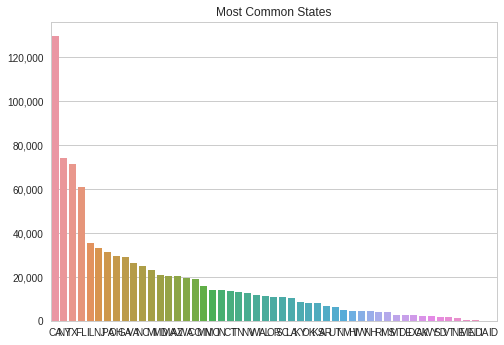

In [6]:
hm1 = pd.value_counts(sublnbk['addr_state']).to_frame().reset_index()
hm1.columns = ['State','count']

print(hm1.head(20))
def state_loans(graph_title):
    
    sns.set_style("whitegrid")
    ax = sns.barplot(y="count", x='State', data=hm1)
    ax.set(xlabel = '', ylabel='', title = graph_title)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
state_loans('Most Common States')

In [7]:
plt.hist(sublnbk['dti'])
fig = plt.gcf()

NameError: name 'plt' is not defined

In [13]:
subber = loanbook['loan_status']

print(subber.head(10))

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
5     Fully Paid
6        Current
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object


In [9]:
lnsdesc = loanbook.describe()


In [11]:
print(lnsdesc.transpose())

                                count          mean           std       min  \
index                        887383.0  1.521557e+05  1.110896e+05      0.00   
member_id                    887382.0  3.500184e+07  2.411336e+07  70473.00   
loan_amnt                    887382.0  1.475528e+04  8.435456e+03    500.00   
funded_amnt                  887382.0  1.474189e+04  8.429899e+03    500.00   
funded_amnt_inv              887382.0  1.470248e+04  8.442108e+03      0.00   
installment                  887382.0  4.367176e+02  2.441866e+02     15.67   
annual_inc                   887378.0  7.502761e+04  6.469823e+04      0.00   
dti                          887382.0  1.815702e+01  1.719060e+01      0.00   
delinq_2yrs                  887353.0  3.144453e-01  8.622475e-01      0.00   
inq_last_6mths               887353.0  6.946221e-01  9.984466e-01      0.00   
mths_since_last_delinq       433069.0  3.406370e+01  2.188494e+01      0.00   
mths_since_last_record       137053.0  7.011790e+01 

In [ ]:
print(lnsdesc.ix[:,:10])

In [ ]:
print(lnsdesc.ix[:,10:20])

In [ ]:
print(lnsdesc.ix[:,20:30])

In [ ]:
print(lnsdesc.ix[:,30:40])

In [ ]:
print(lnsdesc.ix[:,40:49])

In [ ]:
hm = pd.value_counts(loanbook['emp_length']).to_frame().reset_index()
hm.columns = ['type','count']

def emp_dur_graph(graph_title):
    
    sns.set_style("whitegrid")
    ax = sns.barplot(y="count", x='type', data=hm)
    ax.set(xlabel = '', ylabel='', title = graph_title)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use('ggplot')
ax = emp_dur_graph('ggplot style')

In [ ]:
hm = pd.value_counts(loanbook['home_ownership']).to_frame().reset_index()
hm.columns = ['type','count']

def emp_dur_graph(graph_title):
    
    sns.set_style("whitegrid")
    ax = sns.barplot(y="count", x='type', data=hm)
    ax.set(xlabel = '', ylabel='', title = graph_title)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of home ownership for issued loans')

In [ ]:
hm = pd.value_counts(loanbook['int_rate']).to_frame().reset_index()
hm.columns = ['type','count']

def emp_dur_graph(graph_title):
    
    sns.set_style("whitegrid")
    ax = sns.scatterplot(y="count", x='type', data=hm)
    ax.set(xlabel = '', ylabel='', title = graph_title)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

In [ ]:
import datetime

loanbook.issue_d.fillna(value=np.nan,inplace=True)
issue_d_todate = pd.to_datetime(loanbook.issue_d)
loanbook.issue_d = pd.Series(loanbook.issue_d).str.replace('-2015','')
loanbook.emp_length.fillna(value=np.nan,inplace=True)

loanbook.drop(['loan_status'],1,inplace=True)

loanbook.drop(['pymnt_plan','url','desc','title'],1,inplace=True)

loanbook.earliest_cr_line = pd.to_datetime(loanbook.earliest_cr_line)
import datetime as dt

loanbook['earliest_cr_line_year'] = loanbook['earliest_cr_line'].dt.year


In [ ]:
import matplotlib.pyplot as plt

s = pd.value_counts(loanbook['earliest_cr_line']).to_frame().reset_index()
s.columns = ['date','count']

s['year'] = s['date'].dt.year
s['month'] = s['date'].dt.month

d = s[s['year']>2008]

plt.rcParams.update(plt.rcParamsDefault)
sns.set_style("whitegrid")

g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d.year.max()])
plt.tight_layout()

In [ ]:
group = loanbook.groupby('grade').agg([np.mean])
loan_amt_mean = group['loan_amnt'].reset_index()

plt.style.use('fivethirtyeight')

sns.set_style("whitegrid")
ax = sns.barplot(y="mean", x = 'grade', data = loan_amt_mean)
ax.set(xlabel='', ylabel = '', title = 'Average amount loan, by loan grade')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)